In [3]:
import pandas as pd
import numpy as np

buildings = pd.read_csv('ENB2012_data.csv')
buildings.head()

,Compactness,SurfaceArea,WallArea,RoofArea,Height,Orientation,WindowsArea,WindowsDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
buildings.describe()

,Compactness,SurfaceArea,WallArea,RoofArea,Height,Orientation,WindowsArea,WindowsDistribution,HeatingLoad,CoolingLoad
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [5]:
buildings.isnull().values.any()

False

### Combine the heating and cooling loads into a single metric

In [6]:
buildings['CombinedLoad'] = buildings['HeatingLoad'] + buildings['CoolingLoad']

In [7]:
buildings.head()

,Compactness,SurfaceArea,WallArea,RoofArea,Height,Orientation,WindowsArea,WindowsDistribution,HeatingLoad,CoolingLoad,CombinedLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12


In [8]:
buildings.drop(['HeatingLoad', 'CoolingLoad'], axis=1, inplace=True)

In [9]:
buildings.head()

,Compactness,SurfaceArea,WallArea,RoofArea,Height,Orientation,WindowsArea,WindowsDistribution,CombinedLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,36.88
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,36.88
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,36.88
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,36.88
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,49.12


### One-hot encode the categorical data in our DataFrame

In [10]:
encoded = pd.get_dummies(buildings, columns=['Orientation', 'WindowsDistribution'])

In [11]:
encoded.head()

,Compactness,SurfaceArea,WallArea,RoofArea,Height,WindowsArea,CombinedLoad,Orientation_2,Orientation_3,Orientation_4,Orientation_5,WindowsDistribution_0,WindowsDistribution_1,WindowsDistribution_2,WindowsDistribution_3,WindowsDistribution_4,WindowsDistribution_5
0,0.98,514.5,294.0,110.25,7.0,0.0,36.88,1,0,0,0,1,0,0,0,0,0
1,0.98,514.5,294.0,110.25,7.0,0.0,36.88,0,1,0,0,1,0,0,0,0,0
2,0.98,514.5,294.0,110.25,7.0,0.0,36.88,0,0,1,0,1,0,0,0,0,0
3,0.98,514.5,294.0,110.25,7.0,0.0,36.88,0,0,0,1,1,0,0,0,0,0
4,0.90,563.5,318.5,122.50,7.0,0.0,49.12,1,0,0,0,1,0,0,0,0,0


### Split our data into features and labels

In [12]:
X = encoded.drop(['CombinedLoad'], axis=1)

In [13]:
X.head()

,Compactness,SurfaceArea,WallArea,RoofArea,Height,WindowsArea,Orientation_2,Orientation_3,Orientation_4,Orientation_5,WindowsDistribution_0,WindowsDistribution_1,WindowsDistribution_2,WindowsDistribution_3,WindowsDistribution_4,WindowsDistribution_5
0,0.98,514.5,294.0,110.25,7.0,0.0,1,0,0,0,1,0,0,0,0,0
1,0.98,514.5,294.0,110.25,7.0,0.0,0,1,0,0,1,0,0,0,0,0
2,0.98,514.5,294.0,110.25,7.0,0.0,0,0,1,0,1,0,0,0,0,0
3,0.98,514.5,294.0,110.25,7.0,0.0,0,0,0,1,1,0,0,0,0,0
4,0.90,563.5,318.5,122.50,7.0,0.0,1,0,0,0,1,0,0,0,0,0


In [14]:
y = encoded['CombinedLoad']
y

0      36.88
1      36.88
2      36.88
3      36.88
4      49.12
       ...  
763    39.28
764    33.42
765    33.55
766    33.09
767    32.67
Name: CombinedLoad, Length: 768, dtype: float64

### Normalize the feature data in preparation for training

array([[<AxesSubplot:title={'center':'Compactness'}>,
        <AxesSubplot:title={'center':'SurfaceArea'}>],
       [<AxesSubplot:title={'center':'WallArea'}>,
        <AxesSubplot:title={'center':'RoofArea'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'WindowsArea'}>]], dtype=object)

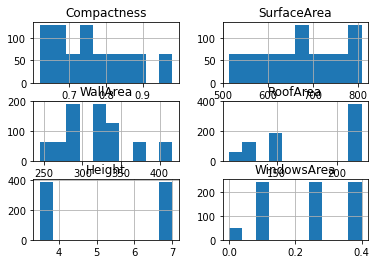

In [15]:
X.hist(column=['Compactness', 'SurfaceArea', 'WallArea', 'RoofArea', 'Height', 'WindowsArea'])

### We will choose to normalize these columns by scaling them into the range 0-1 prior to training

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))

In [18]:
X_scaled.head(100)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.000000,0.000000,0.285714,0.000000,1.0,0.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,0.00,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,1.000000,0.714286,1.000000,0.0,0.25,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
96,1.000000,0.000000,0.285714,0.000000,1.0,0.25,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
97,1.000000,0.000000,0.285714,0.000000,1.0,0.25,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
98,1.000000,0.000000,0.285714,0.000000,1.0,0.25,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Split our prepared data into training and testing sets

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1234)

### Train and evaluate a linear regression model

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [23]:
model.fit(X_train, y_train)

LinearRegression()

#### Report the model's performance using mean squared error (MSE), mean absolute error (MAE), and root mean squared error (RMSE).

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

test_mse = mean_squared_error(y_test, model.predict(X_test))
test_mae = mean_absolute_error(y_test, model.predict(X_test))
test_rmse = test_mse ** 0.5

print('Testing mse = ', test_mse, 'mae = ', test_mae, 'rmse = ', test_rmse)

Testing mse =  29.16223636363636 mae =  3.9961038961038953 rmse =  5.4002070667370115


### Train and evaluate a decision tree regressor model

In [27]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=1234)

In [28]:
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1234)

In [29]:
test_mse = mean_squared_error(y_test, tree_model.predict(X_test))
test_mae = mean_absolute_error(y_test, tree_model.predict(X_test))
test_rmse = test_mse ** 0.5
 
print("Testing mse = ", test_mse, " mae = ", test_mae, " rmse = ", test_rmse)

Testing mse =  4.424222077922075  mae =  1.2259740259740257  rmse =  2.103383483324445


### Train and evaluate a random forest regressor model

In [30]:
from sklearn.ensemble import RandomForestRegressor
 
forest_model = RandomForestRegressor(random_state=1234)

In [31]:
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1234)

In [32]:
test_mse = mean_squared_error(y_test, forest_model.predict(X_test))
test_mae = mean_absolute_error(y_test, forest_model.predict(X_test))
test_rmse = test_mse ** 0.5
 
print("Testing mse = ", test_mse, " mae = ", test_mae, " rmse = ", test_rmse)

Testing mse =  2.82476307474025  mae =  1.1010512987012984  rmse =  1.6807031489053175


### Perform a grid search for the besr random forest hyperparameters and apply them

In [34]:
from sklearn.model_selection import GridSearchCV
 
grid = {
    'n_estimators': [10, 100, 200, 500],
    'criterion': ['squared_error', 'absolute_error', 'poisson'],
    'random_state' : [1234]
}
 
forest_cv = GridSearchCV(estimator = RandomForestRegressor(),
                         param_grid=grid,
                         cv=5)
 
forest_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'n_estimators': [10, 100, 200, 500],
                         'random_state': [1234]})

In [35]:
forest_cv.best_params_

{'criterion': 'absolute_error', 'n_estimators': 500, 'random_state': 1234}

In [36]:
forest_model = RandomForestRegressor(n_estimators=500, criterion='absolute_error')
forest_model.fit(X_train, y_train)
 
test_mse = mean_squared_error(y_test, forest_model.predict(X_test))
test_mae = mean_absolute_error(y_test, forest_model.predict(X_test))
test_rmse = test_mse ** 0.5
 
print("Testing mse = ", test_mse, " mae = ", test_mae, " rmse = ", test_rmse)

Testing mse =  2.6369945316597665  mae =  1.0893733766233897  rmse =  1.6238825486037365
